In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import re
import seaborn as sns

In [2]:
glob.glob('*txt')

['dates with time.txt', 'EPOCH_1_COMPLETE Train Data DistilBERT.txt']

In [3]:
DISTILBERT_TEST_SET = "./Test and Validation Set/distilBERT epoch 7 trained scrapped date data test set.txt"
DISTILBERT_VAL_SET_1 = "./Test and Validation Set/distilbert 7 epochs test on before scrapping 2020 data first two months.txt"
DISTILBERT_VAL_SET_2 = "./Test and Validation Set/distiBERT train set before scrapping data.txt"
BERT_TEST_SET = "./Test and Validation Set/BERT epoch 7 trained scrapped data on test set.txt"
BERT_VAL_SET = "./Test and Validation Set/BERT scrapped from before scrapping test data.txt"

In [4]:
def text_to_dataframe_parser(file_path):
    with open(file_path, 'r') as file:
        data = file.readlines()
    date_pattern = r'\d{2}/\d{2}/\d{4}'
    percentage_pattern = r'\b\d+\.\d+%\b'
    date_list = []
    all_data = []
    time_list = []
    for line in data:
        matches = re.findall(date_pattern, line)   
        fractions_match = re.findall(r'\d+/\d+', line)
        if len(matches) > 0:
            date_list.append(matches[0])
        elif 'Letters' in line and len(fractions_match) > 0:
            letter_part = fractions_match[0].split('/')
            word_part = fractions_match[1].split('/')
            
            letter_accu = round(float(letter_part[0]) / float(letter_part[1]), 6)
            word_accu = round(float(word_part[0]) / float(word_part[1]), 6)
            all_data.append((date_list[-1], fractions_match[0], fractions_match[1], letter_accu * 100, word_accu * 100))
        
        # for average time information
        if 'Total' in line:
            time_list.append(round(float(line.split(' ')[-1].strip('\n')), 2))
            
    df = pd.DataFrame(all_data, columns = ['Date', 'Letters Correct', 'Words Correct', 'Letters Accuracy (%)', 'Words Accuracy (%)'])
    avg_letter_accuracy = df['Letters Accuracy (%)'].mean()
    avg_word_accuracy = df['Words Accuracy (%)'].mean()
    if len(time_list) == 0:
        avg_inference_time = 0
    else:
        avg_inference_time = sum(time_list) / len(time_list)
    print(avg_inference_time)
    return df, avg_letter_accuracy, avg_word_accuracy, avg_inference_time

In [5]:
df, avg_l, avg_w, avg_t = text_to_dataframe_parser(BERT_TEST_SET)

58.84556962025316


In [6]:
# Line graph
df_distilbert, _, _, _ = text_to_dataframe_parser(DISTILBERT_TEST_SET)
df_bert, _, _, _ = text_to_dataframe_parser(BERT_TEST_SET)

48.638
58.84556962025316


In [7]:
df_distilbert_val, _, _, _ = text_to_dataframe_parser(DISTILBERT_VAL_SET_1)
df_distilbert_val.to_csv("./distilbert_validation.csv")

55.39632653061225


In [15]:
def generate_line_graph(txt_file_path, x_label = "Test Instance", legend_title = "Legend", output_path = None):
    df, avg_letters, avg_words, _ = text_to_dataframe_parser(txt_file_path)
    dataframe = df
    len_df = len(dataframe)
    
    sns.set_style('whitegrid')
    plt.figure(figsize = (12, 3))

    plt.plot(np.arange(0, len_df), dataframe['Letters Accuracy (%)'], label = 'Letters Accuracy (%)')
    plt.plot(np.arange(0, len_df), dataframe['Words Accuracy (%)'], linestyle = '-.', label = 'Words Accuracy (%)')

    plt.xticks(np.arange(0, len_df, 5), fontsize=10, fontfamily='Serif', fontweight='normal')
    plt.yticks(np.arange(50, 105, 5), fontsize = 10, fontfamily='Serif', fontweight='normal')
    plt.xlabel(x_label, fontsize = 10, fontfamily = 'Serif', fontweight = 'bold')
    plt.ylabel("Accuracy (%)", fontsize = 10, fontfamily = 'Serif', fontweight = 'bold')
    plt.ylim(60, 105)
    plt.xlim(0, len_df)

    # set legend and its font properties
    legend = plt.legend(loc = 'lower right', title = legend_title, prop = {'size': 8, 'family': 'Serif'})
    legend.get_title().set_fontsize(9)  
    legend.get_title().set_fontfamily('Serif')
    legend.get_title().set_fontweight('bold')

    # secondary legend and setting its font properties. 
    additional_text = f"Average Letters Accuracy: {avg_letters:.2f}%\nAverage Words Accuracy: {avg_words:.2f}%"
    secondary_legend = plt.legend([additional_text], loc='lower left', frameon=True, handlelength=0, handletextpad=0, prop = {'size': 9, 'family': 'Serif'})
    plt.gca().add_artist(legend)
    if output_path is not None:
        plt.savefig(output_path, dpi = 300, bbox_inches = 'tight')
    plt.show()

48.638


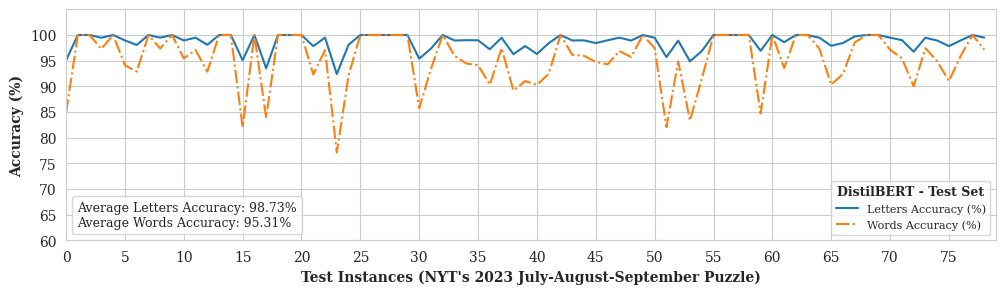

In [20]:
generate_line_graph(DISTILBERT_TEST_SET, x_label = "Test Instances (NYT's 2023 July-August-September Puzzle)", legend_title = "DistilBERT - Test Set", output_path = "./distilbert on test set.png")

58.84556962025316


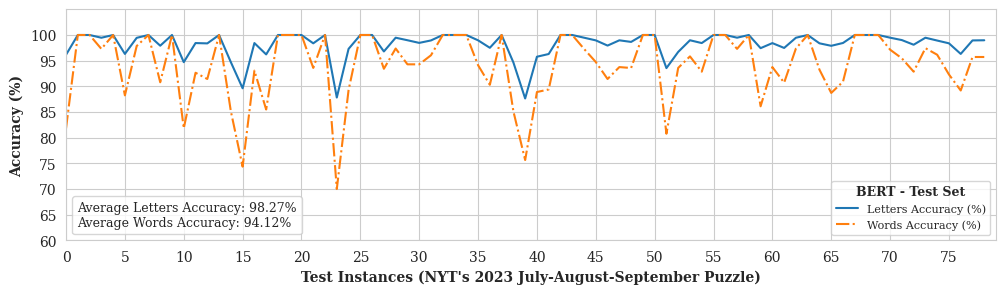

In [21]:
generate_line_graph(BERT_TEST_SET, x_label = "Test Instances (NYT's 2023 July-August-September Puzzle)", legend_title = "BERT - Test Set", output_path = "./bert on test set.png")

55.39632653061225


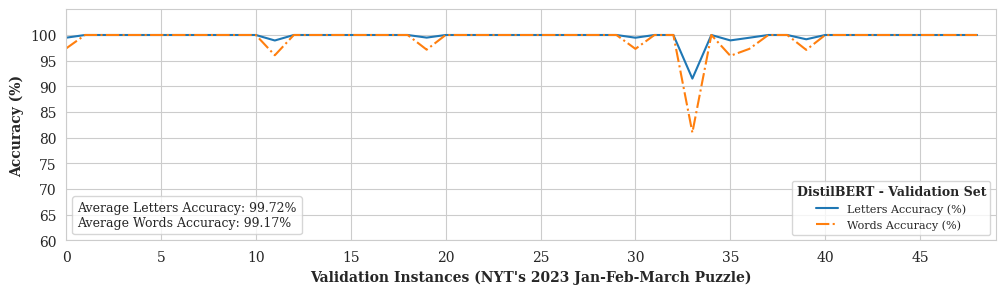

In [19]:
generate_line_graph(DISTILBERT_VAL_SET_1, x_label = "Validation Instances (NYT's 2023 Jan-Feb-March Puzzle)", legend_title = "DistilBERT - Validation Set", output_path = "./distilbert on validation set.png")

61.751323529411756


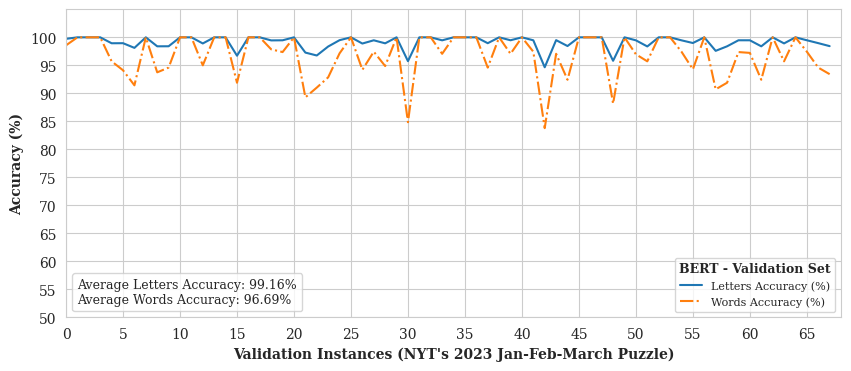

In [55]:
generate_line_graph(BERT_VAL_SET, x_label = "Validation Instances (NYT's 2023 Jan-Feb-March Puzzle)", legend_title = "BERT - Validation Set", output_path = "./bert on validation set.png")

In [56]:
def perfect_puzzle_accuracy(txt_file_path):
    df, _, _, _ = text_to_dataframe_parser(txt_file_path)
    perfect_puzzle_accuracy = len(df[df['Letters Accuracy (%)'] == 100.0000]) / len(df)
    return str(round(perfect_puzzle_accuracy * 100, 2)) + '%'

In [41]:
print("DISTILBERT_TEST_SET: ", perfect_puzzle_accuracy(DISTILBERT_TEST_SET))
print("BERT_TEST_SET: ", perfect_puzzle_accuracy(BERT_TEST_SET))
print("DISTILBERT_VAL_SET_1: ", perfect_puzzle_accuracy(DISTILBERT_VAL_SET_1))
print("DISTILBERT_VAL_SET_2: ", perfect_puzzle_accuracy(DISTILBERT_VAL_SET_2))
print("BERT_VAL_SET: ", perfect_puzzle_accuracy(BERT_VAL_SET))

DISTILBERT_TEST_SET:  36.71%
BERT_TEST_SET:  34.18%
DISTILBERT_VAL_SET_1:  83.67%
DISTILBERT_VAL_SET_2:  45.59%
BERT_VAL_SET:  42.65%
